In [13]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [14]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [15]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [30]:
from sklearn.model_selection import train_test_split
### Ваш код ###
features = list(data.columns)
features.remove('quality')

X, y = data[features], data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [17]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [18]:

### Ваш код ###

def get_accuracy_default(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


acc_DT = get_accuracy_default(DecisionTreeClassifier(random_state=RANDOM_STATE))
acc_Bagging = get_accuracy_default(BaggingClassifier(n_estimators=100, random_state=RANDOM_STATE))
acc_RF = get_accuracy_default(RandomForestClassifier(random_state=RANDOM_STATE))

results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.572917
1,BaggingClassifier,task2,0.641667
2,RandomForestClassifier,task2,0.654167


*RandomForestClassifier показал лучшее значение accuracy. Немного хуже отработал BaggingClassifier и уже более значительно хуже от первых 2-х отработал DecisionTreeClassifier, из чего можно сделать вывод, что ансамбли на этих данных работают лучше простого дерева*

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [19]:
%matplotlib inline
from matplotlib import pyplot as plt

In [8]:
estimator_count = [10, 50, 100]
estimator_count.extend(np.arange(200, 5001, 200))

In [9]:
### Ваш код ###
x = []
y = []
for estimator in estimator_count:
    x.append(estimator)
    acc_RF = get_accuracy_default(RandomForestClassifier(n_estimators=estimator))
    y.append(acc_RF)

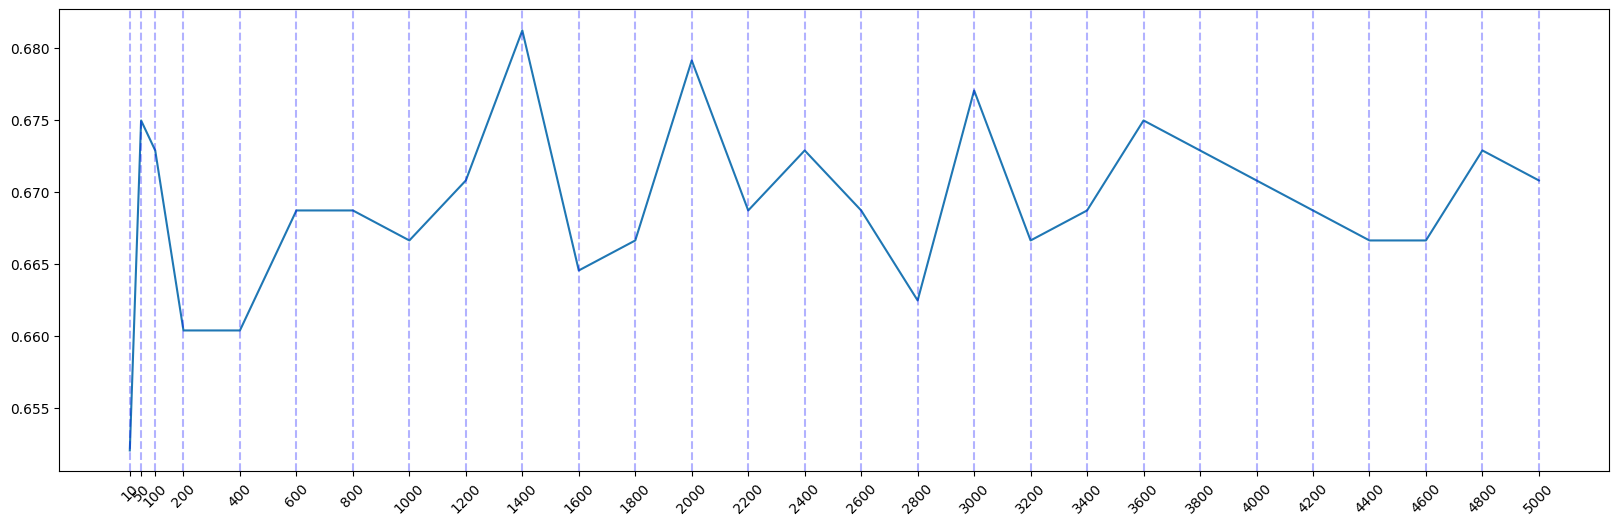

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(x, y)
plt.xticks(estimator_count, rotation=45)

for tick in estimator_count:
    plt.axvline(x=tick, color='b', linestyle='--', alpha=0.3)

*На графике видно, что зависимость качества от количества деревьев неровный. При росте количества деревьев наблюдается
как рост так и падение качества модели. Пикового значения качество достигает при количестве деревьев равным 1400*

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


In [21]:
### Ваш код ###

acc_sklearn = cross_val_score(GradientBoostingClassifier(), X, y, scoring='accuracy').mean()

le = LabelEncoder()
y_boost = le.fit_transform(y)
acc_xgboost = cross_val_score(XGBClassifier(), X, y_boost, scoring='accuracy').mean()

results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.572917
1,BaggingClassifier,task2,0.641667
2,RandomForestClassifier,task2,0.654167
3,GradientBoostingClassifier,task4,0.562851
4,XGBClassifier,task4,0.541597


*градиентный бустинг sklearn отработал немного лучше, чем xgboost, но обе модели отработали значительно хуже, чем модели в предыдущих экспериментах*

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [22]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

In [27]:
%%time
### Ваш код ###

gb_params = {
    'n_estimators': np.arange(0, 200, 50),
    'max_depth': [3, 6, 9, 12, 15],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

grid = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)

best_params_sklearn = grid.best_params_
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)

acc_sklearn_cv = accuracy_score(y_test, y_pred)

results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]

Параметры лучшей модели sklearn:
 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
CPU times: total: 7.42 s
Wall time: 7min 18s


In [54]:
%%time
xgb_params = {
    'n_estimators': np.arange(0, 700, 100),
    'max_depth': [3, 6, 9, 12, 15],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

le = LabelEncoder()
y_boost_encoded = le.fit_transform(y_train)

grid = GridSearchCV(XGBClassifier(), xgb_params, cv=3, n_jobs=-1)
grid.fit(X_train, y_boost_encoded)
y_pred_encoded = grid.best_estimator_.predict(X_test)

y_pred = le.inverse_transform(y_pred_encoded)

best_params_xgboost = grid.best_params_

print('Параметры лучшей модели xgboost:\n', best_params_xgboost)

acc_xgboost_cv = accuracy_score(y_test, y_pred)

results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

Параметры лучшей модели xgboost:
 {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100}
CPU times: total: 3.67 s
Wall time: 2min 23s


In [ ]:
results

,model,task,accuracy
5,GradientBoostingClassifier_CV,task5,0.645833
6,XGBClassifier_CV,task5,0.675000


*градиентный бустинг библиотеки xgboost отработал значительно быстрее sklearn, при этом в sklearn пришлось уменьшать диапазон кол-ва деревьев, иначе время работы увеличивалось еще больше, а результат при этом падал, возможно модель переобучилась.*

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [23]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [34]:
%%time
### Ваш код ###

acc_lightgbm = cross_val_score(LGBMClassifier(verbose=-1), X, y, scoring='accuracy').mean()
acc_catboost = cross_val_score(CatBoostClassifier(verbose=False), X, y, scoring='accuracy').mean()

results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

CPU times: total: 2min 17s
Wall time: 44.9 s


In [16]:
results

,model,task,accuracy
7,LGBMClassifier,task6,0.557247
8,CatBoostClassifier,task6,0.545976


*с параметрами по умолчанию качество всех 4-х моделей по cross_val_score примерно одинаковое. Чуть лучше результат показал GradientBoostingClassifier.*

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [25]:
%%time
### Ваш код ###

gb_params = {
    'n_estimators': np.arange(0, 700, 100),
    'max_depth': [3, 6, 9, 12, 15],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

grid = GridSearchCV(LGBMClassifier(verbose=-1), gb_params, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)

best_params_lightgbm = grid.best_params_
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)

acc_lightgbm_cv = accuracy_score(y_test, y_pred)

results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]

Параметры лучшей модели lightgbm:
 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
CPU times: total: 4.77 s
Wall time: 3min 3s


*с такими же параметрами как xgboost catboost не отрабатывает в течении слишком долгого времени, уменьшил диапазон значений параметров*

In [24]:
%%time

gb_params = {
    'n_estimators': np.arange(0, 150, 50),
    'max_depth': [3, 6, 9],
    'learning_rate': [0.2, 0.3, 0.4, 0.5]
}

grid = GridSearchCV(CatBoostClassifier(verbose=False), gb_params, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
y_pred = grid.best_estimator_.predict(X_test)

best_params_catboost = grid.best_params_
print('Параметры лучшей модели catboost:\n', best_params_catboost)
acc_catboost_cv = accuracy_score(y_test, y_pred)

results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

Параметры лучшей модели catboost:
 {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 100}
CPU times: total: 23.9 s
Wall time: 2min 2s


In [35]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.572917
1,BaggingClassifier,task2,0.641667
2,RandomForestClassifier,task2,0.654167
3,GradientBoostingClassifier,task4,0.562851
4,XGBClassifier,task4,0.541597
10,CatBoostClassifier_CV,task7,0.650000
9,LGBMClassifier_CV,task7,0.662500
5,GradientBoostingClassifier_CV,task5,0.645833
6,XGBClassifier_CV,task5,0.675000
7,LGBMClassifier,task6,0.557247


*наилучшие результаты показала модель XGBClassifier как по accuracy так и по скорости выполнения. 2 модели - CatBoostClassifier и GradientBoostingClassifier не смогли отрабоать на том же наборе параметров, на которых отработали 2 другие модели, пришлось уменьшать диапазон. При этом эти модели так же показали худшие показатели по accuracy. По итогу для данной выборки наиболее подходящей моделью является XGBClassifier* 

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [51]:
import optuna
import logging

In [55]:
%%time
### Ваш код ###
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):    

    param = {        
        "n_estimators" : trial.suggest_int("n_estimators", 0, 700, step=100),
        "max_depth": trial.suggest_int("max_depth", 3, 15, step=3),
        "learning_rate": trial.suggest_float("learning_rate", 0.1, 0.6, step=0.1),
        "verbosity": 0,
        "objective": "binary:logistic",
        "booster": "gbtree"
    }

    le = LabelEncoder()
    y_boost_encoded = le.fit_transform(y_train)

    bst = XGBClassifier(**param).fit(X_train, y_boost_encoded)
    y_pred_encoded = bst.predict(X_test)

    y_pred = le.inverse_transform(y_pred_encoded)    

    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)

best_params_xgboost_optuna = study.best_trial.params
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
acc_xgboost_optuna = study.best_trial.value
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

Параметры лучшей модели xgboost:
 {'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.1}
CPU times: total: 3min 35s
Wall time: 1min 7s


In [56]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.572917
1,BaggingClassifier,task2,0.641667
2,RandomForestClassifier,task2,0.654167
3,GradientBoostingClassifier,task4,0.562851
4,XGBClassifier,task4,0.541597
10,CatBoostClassifier_CV,task7,0.650000
9,LGBMClassifier_CV,task7,0.662500
5,GradientBoostingClassifier_CV,task5,0.645833
6,XGBClassifier_CV,task5,0.675000
7,LGBMClassifier,task6,0.557247


*подбор параметров с помощью optuna отработал быстрее в 2 раза. Подобранные параметры немного отличаюются, например sklearn выбрал количестов деревьев -100, optuna выбрал лучшим 400 деревьев, качество модели немного улучшилось.*

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [58]:
from sklearn.ensemble import StackingClassifier

In [ ]:
%%time
### Ваш код ###

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

estimators = [
    ('skl', GradientBoostingClassifier()),
    ('xgb', XGBClassifier()),
    ('ctb', CatBoostClassifier()),
    ('lgb', LGBMClassifier())
]
clf = StackingClassifier(
     estimators=estimators,
    verbose=False
)

clf.fit(X_train, y_train_encoded)

y_pred_encoded = clf.predict(X_test)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

acc_stacking_default = accuracy_score(y_pred, y_test)
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

In [71]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.572917
1,BaggingClassifier,task2,0.641667
2,RandomForestClassifier,task2,0.654167
3,GradientBoostingClassifier,task4,0.562851
4,XGBClassifier,task4,0.541597
10,CatBoostClassifier_CV,task7,0.650000
9,LGBMClassifier_CV,task7,0.662500
5,GradientBoostingClassifier_CV,task5,0.645833
6,XGBClassifier_CV,task5,0.675000
7,LGBMClassifier,task6,0.557247


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [ ]:
### Ваш код ###

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

estimators = [
    ('skl', GradientBoostingClassifier(**best_params_sklearn)),
    ('xgb', XGBClassifier(**best_params_xgboost_optuna)),
    ('ctb', CatBoostClassifier(**best_params_catboost)),
    ('lgb', LGBMClassifier(**best_params_lightgbm))
]
clf = StackingClassifier(
     estimators=estimators,
    verbose=False
)

clf.fit(X_train, y_train_encoded)

y_pred_encoded = clf.predict(X_test)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

acc_stacking = accuracy_score(y_pred, y_test)
results.loc[13] = ['Stacking', 'task10', acc_stacking]

In [81]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.572917
1,BaggingClassifier,task2,0.641667
2,RandomForestClassifier,task2,0.654167
3,GradientBoostingClassifier,task4,0.562851
4,XGBClassifier,task4,0.541597
10,CatBoostClassifier_CV,task7,0.650000
9,LGBMClassifier_CV,task7,0.662500
5,GradientBoostingClassifier_CV,task5,0.645833
6,XGBClassifier_CV,task5,0.675000
7,LGBMClassifier,task6,0.557247


*качество модели с подобранными параметрами ниже, чем с параметрами по умолчанию, в качестве эксперимента уберем наиболее худшие модели и применим стеккинг только к 2-м лучшим моделям*

In [ ]:
### Ваш код ###

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

estimators = [
    ('xgb', XGBClassifier(**best_params_xgboost_optuna)),
    ('lgb', LGBMClassifier(**best_params_lightgbm))
]
clf = StackingClassifier(
     estimators=estimators,
    verbose=False
)

clf.fit(X_train, y_train_encoded)

y_pred_encoded = clf.predict(X_test)

y_pred = label_encoder.inverse_transform(y_pred_encoded)

acc_stacking = accuracy_score(y_pred, y_test)
results.loc[14] = ['Stacking without catboost', 'task11', acc_stacking]

In [82]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.572917
1,BaggingClassifier,task2,0.641667
2,RandomForestClassifier,task2,0.654167
3,GradientBoostingClassifier,task4,0.562851
4,XGBClassifier,task4,0.541597
10,CatBoostClassifier_CV,task7,0.650000
9,LGBMClassifier_CV,task7,0.662500
5,GradientBoostingClassifier_CV,task5,0.645833
6,XGBClassifier_CV,task5,0.675000
7,LGBMClassifier,task6,0.557247


*видим, что качество улучшилось и показало наибольшее качество, видимо параметры худших моделей занижали качество стеккинга*